In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
[df1_2, df1_3, df1_4, df1_5] = pickle.load(open('datasets/MVResultsSess01.pickle','rb'))

In [3]:
[df2_2, df2_3, df2_4, df2_5] = pickle.load(open('datasets/MVResultsSess02.pickle','rb'))

In [42]:
def plot(df, sess, n):
    AIRM = df['AIRM CSP'][:-2]
    LEM = df['LEM CSP'][:-2]
    CLASSIC = df['Classic CSP'][:-2]

    diffLEM = LEM - CLASSIC
    diffAIRM = AIRM - CLASSIC

    print("Session "+ str(sess) + ", LEM, N="+str(n))
    print('Classical CSP Average accuracy = ' + str(df.loc['Average', 'Classic CSP']))
    print('LEM CSP average accuracy = ' + str(df.loc['Average', 'LEM CSP']))
    print('p-value = ' + str(df.loc['p-value', 'LEM CSP']))

    plt.figure()
    plt.xlim(-35, 35)
    ax = sns.distplot(diffLEM, kde=True, hist=False, color='black')
    ax.set(xlabel = 'LEM CSP results - CSP results')
    line = ax.get_lines()[0]
    x, y = line.get_data() 
    mask = x > 0
    x, y = x[mask], y[mask]
    plt.plot([0, 0], [0, y[0]-0.0008], 'k')
    ax.fill_between(x, y1=y, alpha=0.5, facecolor='grey')
    plt.show()



    print('\n')

    print("Session " + str(sess) + ", AIRM, N="+str(n))
    print('Classical CSP Average accuracy = ' + str(df.loc['Average', 'Classic CSP']))
    print('AIRM CSP average accuracy = ' + str(df.loc['Average', 'AIRM CSP']))
    print('p-value = ' + str(df.loc['p-value', 'AIRM CSP']))

    plt.figure()
    plt.xlim(-35, 35)
    ax = sns.distplot(diffLEM, kde=True, hist=False, color='black')
    ax.set(xlabel = 'LEM AIRM results - CSP results')
    line = ax.get_lines()[0]
    x, y = line.get_data()  
    mask = x > 0
    x, y = x[mask], y[mask]
    plt.plot([0, 0], [0, y[0]-0.0008], 'k')
    ax.fill_between(x, y1=y, alpha=0.5, facecolor='grey')
    plt.show()

# Session 1

Session 1, LEM, N=2
Classical CSP Average accuracy = 62.03703703703704
LEM CSP average accuracy = 65.62962962962963
p-value = 0.000272633066570251


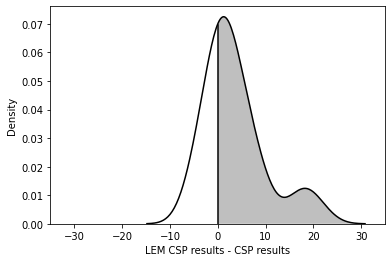



Session 1, AIRM, N=2
Classical CSP Average accuracy = 62.03703703703704
AIRM CSP average accuracy = 65.35185185185185
p-value = 0.001613593364985762


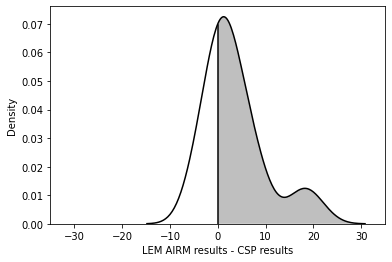

In [43]:
plot(df1_2, 1, 2)

Session 1, LEM, N=3
Classical CSP Average accuracy = 62.50925925925926
LEM CSP average accuracy = 65.0
p-value = 0.003931278556637743


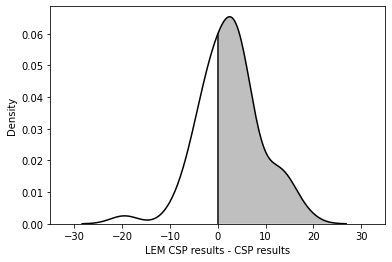



Session 1, AIRM, N=3
Classical CSP Average accuracy = 62.50925925925926
AIRM CSP average accuracy = 65.55555555555556
p-value = 0.001988984393789396


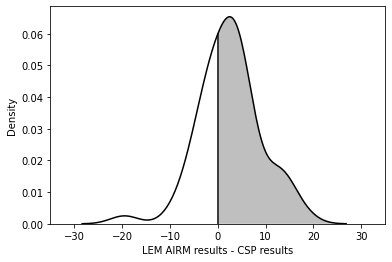

In [44]:
plot(df1_3, 1, 3)

Session 1, LEM, N=4
Classical CSP Average accuracy = 62.601851851851855
LEM CSP average accuracy = 65.11111111111111
p-value = 0.009647206333321829


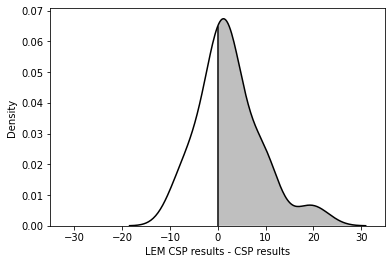



Session 1, AIRM, N=4
Classical CSP Average accuracy = 62.601851851851855
AIRM CSP average accuracy = 65.30555555555556
p-value = 0.012121971979223043


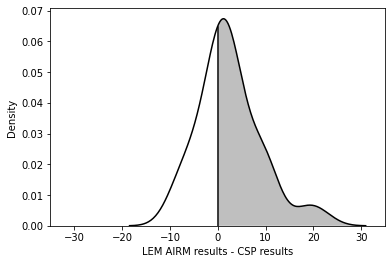

In [45]:
plot(df1_4, 1, 4)

Session 1, LEM, N=5
Classical CSP Average accuracy = 62.833333333333336
LEM CSP average accuracy = 64.87962962962963
p-value = 0.03689065921949789


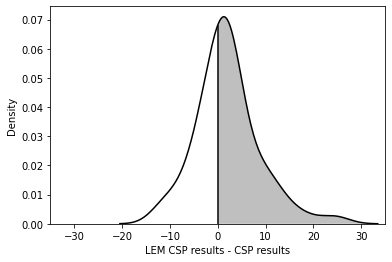



Session 1, AIRM, N=5
Classical CSP Average accuracy = 62.833333333333336
AIRM CSP average accuracy = 65.25925925925925
p-value = 0.007086094400764095


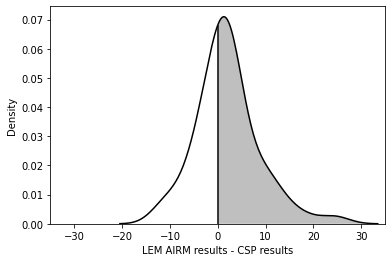

In [46]:
plot(df1_5, 1, 5)

# Session 2 

Session 2, LEM, N=2
Classical CSP Average accuracy = 66.25
LEM CSP average accuracy = 67.18518518518519
p-value = 0.025128711408466276


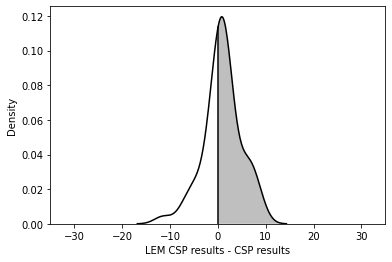



Session 2, AIRM, N=2
Classical CSP Average accuracy = 66.25
AIRM CSP average accuracy = 67.04629629629629
p-value = 0.08312129031795158


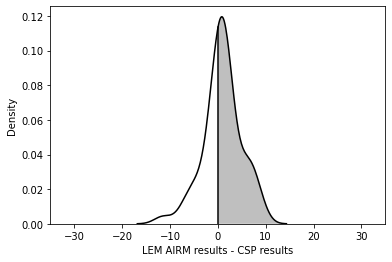

In [47]:
plot(df2_2, 2, 2)

Session 2, LEM, N=3
Classical CSP Average accuracy = 66.62962962962963
LEM CSP average accuracy = 67.39814814814815
p-value = 0.1773260598856623


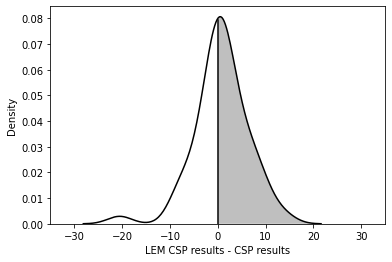



Session 2, AIRM, N=3
Classical CSP Average accuracy = 66.62962962962963
AIRM CSP average accuracy = 67.25925925925925
p-value = 0.27182314916426475


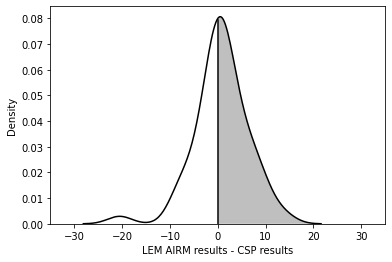

In [48]:
plot(df2_3, 2, 3)

Session 2, LEM, N=4
Classical CSP Average accuracy = 66.04629629629629
LEM CSP average accuracy = 67.00925925925925
p-value = 0.1939012569657298


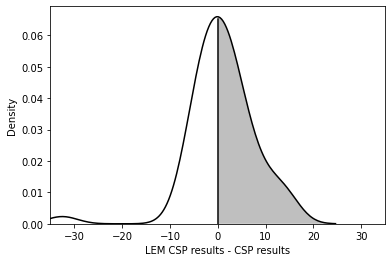



Session 2, AIRM, N=4
Classical CSP Average accuracy = 66.04629629629629
AIRM CSP average accuracy = 67.1574074074074
p-value = 0.15675971876517442


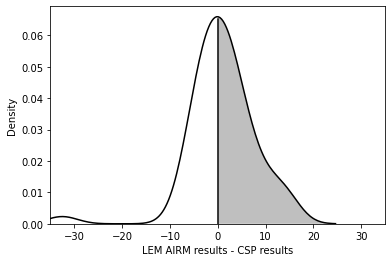

In [50]:
plot(df2_4, 2, 4)

Session 2, LEM, N=5
Classical CSP Average accuracy = 67.75925925925925
LEM CSP average accuracy = 66.25
p-value = 0.0904042997601001


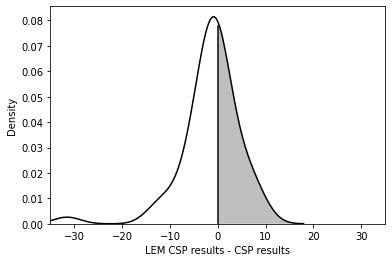



Session 2, AIRM, N=5
Classical CSP Average accuracy = 67.75925925925925
AIRM CSP average accuracy = 67.07407407407408
p-value = 0.8098897269600319


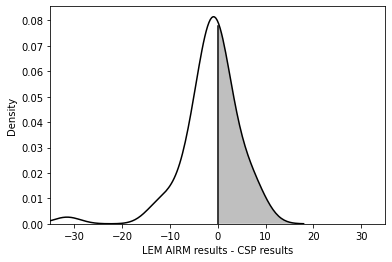

In [51]:
plot(df2_5, 2, 5)